In [45]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

In [46]:
tf.disable_eager_execution()

In [47]:
def get_data():
    x = np.linspace(-1, 1, 100)
    y = 2 * x + np.random.randn(*x.shape) * 0.3
    return x, y

In [62]:
def linear_regression():
    # Note: shape=(None,) 说明该变量是一个一维动态变量，这个维度上可以是任意大小。
    # Note: The second argument shape=(None,) indicates that 
    # these variables take on a 1-dimensional value of a dynamic size.
    # We can use the None value in this case to allow for arbitrary batch sizes.
    x = tf.placeholder(tf.float32, shape=(None,), name="x")
    y = tf.placeholder(tf.float32, shape=(None,), name="y")
    
    with tf.variable_scope('lreg') as scope:
        w = tf.Variable(np.random.normal(), name="W")
        b = tf.Variable(np.random.normal(), name="b")
        y_pred = tf.multiply(w, x) + b
        
        loss = tf.reduce_mean(tf.square(y_pred - y))
    return x, y, y_pred, loss    

In [66]:
def run():
    x_batch, y_batch = get_data()
    x, y, y_pred, loss = linear_regression()
    
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        feed_dict = {x:x_batch, y: y_batch}
        for epoch in range(100):
            loss_val, _ = sess.run([loss, optimizer], feed_dict)
            if (epoch % 20 == 0):
                print("loss:", loss_val)

        y_pred_batch = sess.run(y_pred, {x: x_batch})
    
    plt.figure(1)
    plt.plot(x_batch, y_batch, 'ro', label="Original Data")
    plt.plot(x_batch, y_pred_batch)
    plt.legend()
    plt.show()


loss: 2.059406
loss: 0.1570848
loss: 0.10725027
loss: 0.10428082
loss: 0.10410337


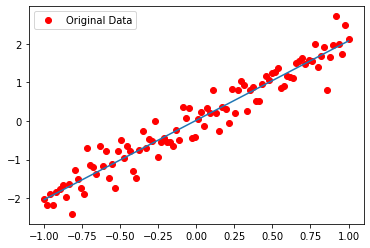

In [67]:
run()